<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day_18_ARIMA_TimeSeries_Forecasting_Cleaned/notebooks/Day_18_ARIMA_TimeSeries_Forecasting_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Day 18: Time Series Forecasting with ARIMA

**Objective:** Use ARIMA to forecast future values of a time series — applied on synthetic stock prices.
- Model: ARIMA (AutoRegressive Integrated Moving Average)
- Task: Predict future prices based on historical data.


In [1]:
# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings("ignore")
register_matplotlib_converters()
sns.set(style="whitegrid")

## 🧪 Generate Synthetic Stock Price Data

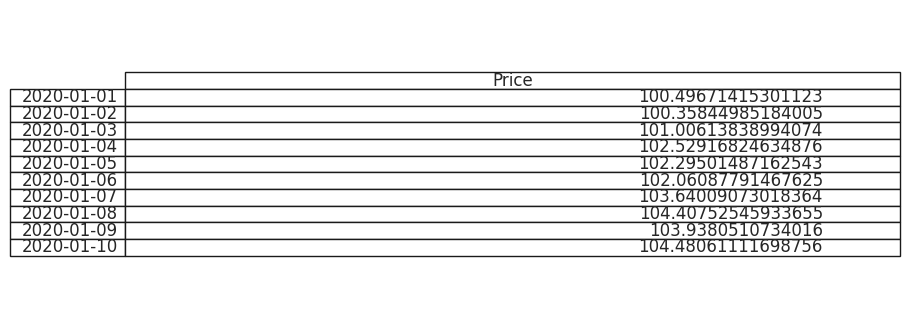

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the data
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=200, freq='D')
price = np.cumsum(np.random.normal(0, 1, 200)) + 100
data = pd.DataFrame({'Date': date_range, 'Price': price})
data.set_index('Date', inplace=True)

# Save first 20 rows as an image of a table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data.head(10).values,
                 colLabels=data.columns,
                 rowLabels=data.head(10).index.strftime('%Y-%m-%d'),
                 loc='center')
plt.savefig('synthetic_data_table.png', bbox_inches='tight')
plt.show()

## 📊 Visualize the Time Series

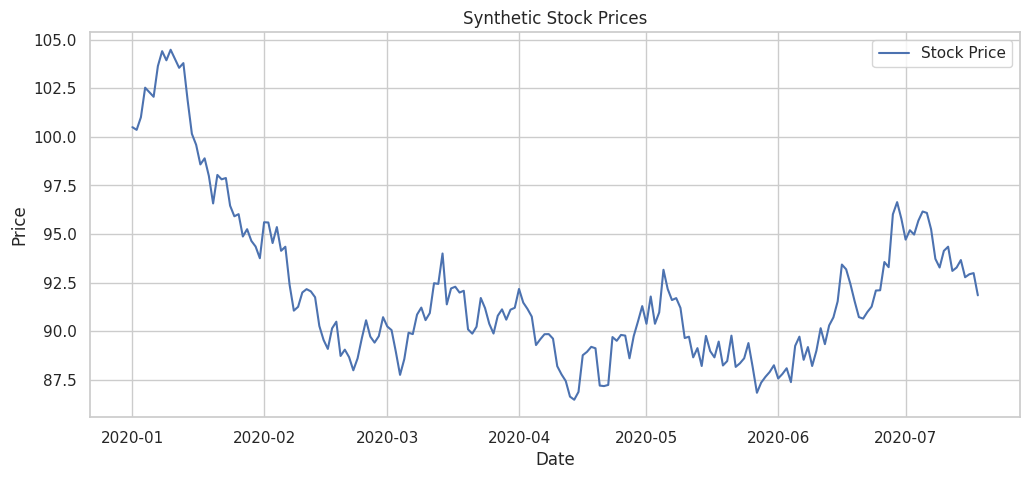

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(data['Price'], label='Stock Price')
plt.title('Synthetic Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('synthetic_stock_prices.png')
plt.show()

## 🔧 Fit ARIMA Model

In [23]:
# ARIMA(p=5, d=1, q=0) as example
model = ARIMA(data['Price'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

## 🔮 Forecast Future Prices

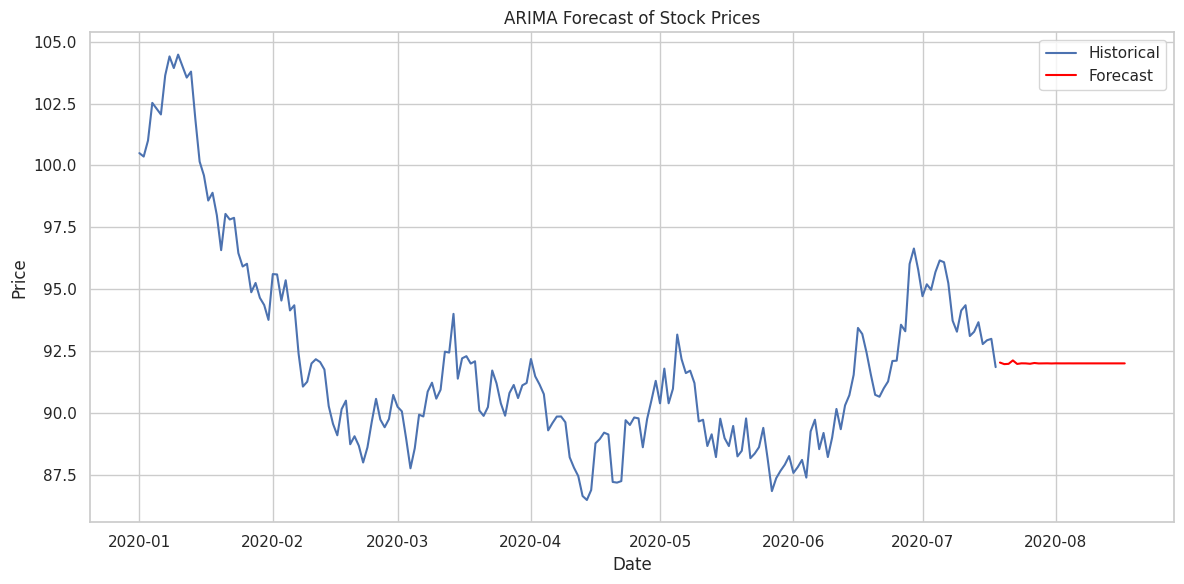

<Figure size 640x480 with 0 Axes>

In [13]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Forecast of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('arima_forecast.png')

## ✅ Summary

- Generated synthetic time series data.
- Fitted ARIMA(5,1,0) model.
- Forecasted 30 future points.
- Visualized forecast vs historical data.

**Next Steps:** Apply on real data (e.g., Yahoo Finance, weather datasets).